# Tutorial: optimal binning with binary target - LocalSolver

To get us started, let's load the application_train.csv file from the Kaggle's competition https://www.kaggle.com/c/home-credit-default-risk/data.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/kaggle/HomeCreditDefaultRisk/application_train.csv", engine='c')

We choose a variable to discretize and the binary target.

In [3]:
variable = "REGION_POPULATION_RELATIVE"
x = df[variable].values
y = df.TARGET.values

Import and instantiate an ``OptimalBinning`` object class. We pass the variable name, its data type, and a solver, in this case, we choose the commercial solver LocalSolver. Note that LocalSolver requires a time limit, which is set to 50 seconds. Besides, for this example, we require a more granular binning, therefore we allow a large number of prebins with small size.

To use LocalSolver follow the avaiable instructions:
https://www.localsolver.com/docs/last/quickstart/solvingyourfirstmodelinpython.html

In [4]:
from optbinning import OptimalBinning

In [5]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="ls", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=50)

We fit the optimal binning object with arrays ``x`` and ``y``.

In [6]:
optb.fit(x, y)

Push initial solutions 100%
Model:  expressions = 78874, decisions = 309, constraints = 6007, objectives = 1
Param:  time limit = 50 sec, no iteration limit

Advanced params:
  nbDisplayedObjs = 5

[objective direction ]:     maximize

[  0 sec,       0 itr]:            0
[ optimality gap     ]:         100%
[  1 sec,     846 itr]:        28654
[  2 sec,    6755 itr]:        33099
[  3 sec,    9327 itr]:        34355
[  4 sec,   13398 itr]:        34355
[  5 sec,   23774 itr]:        34355
[  6 sec,   31741 itr]:        34355
[  7 sec,   38777 itr]:        34355
[  8 sec,   40000 itr]:        34355
[  9 sec,   40000 itr]:        34355
[ 10 sec,   41625 itr]:        34355
[ optimality gap     ]:       84.38%
[ 11 sec,   49490 itr]:        34355
[ 12 sec,   57336 itr]:        34355
[ 13 sec,   61599 itr]:        34355
[ 14 sec,   66505 itr]:        35032
[ 15 sec,   76857 itr]:        35032
[ 16 sec,   80000 itr]:        35032
[ 17 sec,   80000 itr]:        35032
[ 18 sec,   86312 itr]: 

OptimalBinning(cat_cutoff=None, class_weight=None, dtype='numerical', gamma=0,
               max_bin_n_event=None, max_bin_n_nonevent=None, max_bin_size=None,
               max_n_bins=None, max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='ls',
               special_codes=None, split_digits=None, time_limit=50,
               user_splits=None, user_splits_fixed=None, verbose=False)

You can check if an optimal or feasible solution has been found via the ``status`` attribute:

In [7]:
optb.status

'FEASIBLE'

In [8]:
binning_table = optb.binning_table
binning_table.build()
binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08180326
    IV (Jeffrey)             0.03776231
    JS (Jensen-Shannon)      0.00465074
    HHI                      0.23425608
    HHI (normalized)         0.16464300
    Cramer's V               0.05102627
    Quality score            0.06257516

  Significance tests

     Bin A  Bin B  t-statistic       p-value       P[A > B]      P[B > A]
         0      1     1.445262  2.292897e-01   1.013041e-01  8.986959e-01
         1      2   158.939080  1.929529e-36  1.179082e-218  1.000000e+00
         2      3   131.200666  2.238000e-30   1.000000e+00  1.110223e-16
         3      4     0.878638  3.485750e-01   8.240457e-01  1.759543e-01
         4      5    14.925402  1.118468e-04   9.999989e-01  1.123668e-06
         5      6     3.969732  4.632513e-02   9.768847e-01  2.311530e-02
         6      7    

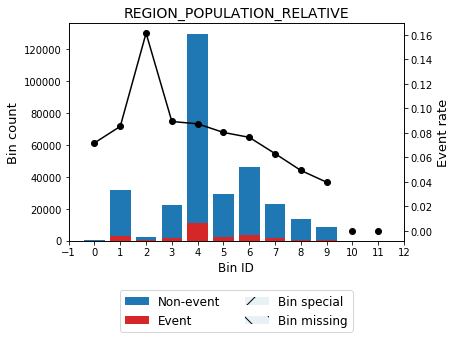

In [9]:
binning_table.plot(metric="event_rate")

In [10]:
optb.information(print_level=1)

optbinning (Version 0.7.0)
Copyright (c) 2019-2020 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : FEASIBLE                        

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0

  Solver statistics
    Type                                  ls
    Number of iterations              222090

  Timing
    Total time                         50.30 sec
    Pre-processing                      0.00 sec   (  0.01%)
    Pre-binning                         0.28 sec   (  0.56%)
    Solver                             50.01 sec   ( 99.43%)
    Post-processing                     0.00 sec   (  0.00%)



Computing the optimal binning starting with a large number of prebins might be challenging in some situations, therefore solvers such as LocalSolver are suitable to find quality feasible solutions in a reasonable amount of time. However, if LocalSolver is not available we can always try solver options "cp" or "mip".

#### Constraint programming solver

First, we keep the 5 seconds time limit:

In [11]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=5)

In [12]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, dtype='numerical', gamma=0,
               max_bin_n_event=None, max_bin_n_nonevent=None, max_bin_size=None,
               max_n_bins=None, max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=5,
               user_splits=None, user_splits_fixed=None, verbose=False)

The status is "UNKNOWN" therefore nor feasible or optimal solutions was found in 5 seconds.

In [13]:
optb.status

'UNKNOWN'

In [14]:
optb.information(print_level=1)

optbinning (Version 0.7.0)
Copyright (c) 2019-2020 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : UNKNOWN                         

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0



We increase the time limit to 30 seconds.

In [15]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=30)

In [16]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, dtype='numerical', gamma=0,
               max_bin_n_event=None, max_bin_n_nonevent=None, max_bin_size=None,
               max_n_bins=None, max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=30,
               user_splits=None, user_splits_fixed=None, verbose=False)

In 30 seconds we found a feasible solution

In [17]:
optb.status

'FEASIBLE'

In [18]:
optb.information(print_level=1)

optbinning (Version 0.7.0)
Copyright (c) 2019-2020 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : FEASIBLE                        

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0

  Solver statistics
    Type                                  cp
    Number of booleans                  3231
    Number of branches                 27576
    Number of conflicts                 7485
    Objective value                    35138
    Best objective bound               74233

  Timing
    Total time                         50.43 sec
    Pre-processing                      0.01 sec   (  0.01%)
    Pre-binning                         0.29 sec   (  0.58%)
    Solver                             50.13 sec   ( 99.41%)
      model generation                 20.12 sec   ( 40.14%)
      optimizer                        30.01 sec   ( 59.86%)
    Post-processing                     0.

In [19]:
binning_table = optb.binning_table
binning_table.build()
binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.07469524
    IV (Jeffrey)             0.03514331
    JS (Jensen-Shannon)      0.00432490
    HHI                      0.14467895
    HHI (normalized)         0.07888503
    Cramer's V               0.04929802
    Quality score            0.00011493

  Significance tests

     Bin A  Bin B  t-statistic       p-value       P[A > B]      P[B > A]
         0      1     1.445262  2.292897e-01   1.013041e-01  8.986959e-01
         1      2   158.939080  1.929529e-36  1.179082e-218  1.000000e+00
         2      3   143.112212  5.555157e-33   1.000000e+00  1.110223e-16
         3      4     0.267984  6.046874e-01   6.963162e-01  3.036838e-01
         4      5     0.010627  9.178954e-01   5.423544e-01  4.576456e-01
         5      6     0.086441  7.687514e-01   6.153143e-01  3.846857e-01
         6      7    

The current solution is IV = 0.03514331, compared to the LocalSolver solver solution 0.03776231. Let us increase the time limit to 200 seconds.

In [20]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=100,
                      min_prebin_size=0.001, time_limit=200)

In [21]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, dtype='numerical', gamma=0,
               max_bin_n_event=None, max_bin_n_nonevent=None, max_bin_size=None,
               max_n_bins=None, max_n_prebins=100, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.001,
               mip_solver='bop', monotonic_trend='auto',
               name='REGION_POPULATION_RELATIVE', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=200,
               user_splits=None, user_splits_fixed=None, verbose=False)

The optimal solution is found within the time limit.

In [22]:
optb.status

'OPTIMAL'

In [23]:
optb.information(print_level=1)

optbinning (Version 0.7.0)
Copyright (c) 2019-2020 Guillermo Navas-Palencia, Apache License 2.0

  Name    : REGION_POPULATION_RELATIVE      
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                    77
    Number of refinements                  0

  Solver statistics
    Type                                  cp
    Number of booleans                  3231
    Number of branches                179982
    Number of conflicts                81050
    Objective value                    37758
    Best objective bound               37758

  Timing
    Total time                        173.83 sec
    Pre-processing                      0.01 sec   (  0.00%)
    Pre-binning                         0.29 sec   (  0.17%)
    Solver                            173.53 sec   ( 99.83%)
      model generation                 19.66 sec   ( 11.33%)
      optimizer                       153.88 sec   ( 88.67%)
    Post-processing                     0.

In [24]:
binning_table = optb.binning_table
binning_table.build()
binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08180326
    IV (Jeffrey)             0.03776231
    JS (Jensen-Shannon)      0.00465074
    HHI                      0.23425608
    HHI (normalized)         0.16464300
    Cramer's V               0.05102627
    Quality score            0.06257516

  Significance tests

     Bin A  Bin B  t-statistic       p-value       P[A > B]      P[B > A]
         0      1     1.445262  2.292897e-01   1.013041e-01  8.986959e-01
         1      2   158.939080  1.929529e-36  1.179082e-218  1.000000e+00
         2      3   131.200666  2.238000e-30   1.000000e+00  1.110223e-16
         3      4     0.878638  3.485750e-01   8.240457e-01  1.759543e-01
         4      5    14.925402  1.118468e-04   9.999989e-01  1.123668e-06
         5      6     3.969732  4.632513e-02   9.768847e-01  2.311530e-02
         6      7    

The optimal solution is IV = 0.03776231, matching the LocalSolver solver solution 0.03776231. 

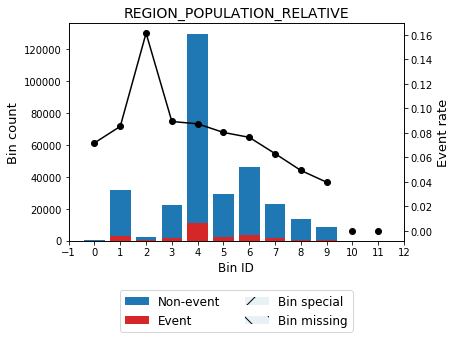

In [25]:
binning_table.plot(metric="event_rate")